In [28]:
# Standard library imports, and Visualization, Statistics, SciKit, ChiSquare libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pylab
from pylab import rcParams

import statsmodels.api as sm
import statistics
from scipy import stats

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

#Skip warning messages
import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [4]:
 # Load churn dataset into a Pandas dataframe
churn_df = pd.read_csv('/Users/Richard/OneDrive - Western Governors University/MSDA/D208/Databases/churn/churn_clean.csv')

# Rename 8 customer survey features to represent descriptions for clarity
churn_df.rename(columns = {'Item1':'TimelyResponse',
'Item2':'Fixes',
'Item3':'Replacements',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respectfulness',
'Item7':'Courteous',
'Item8':'Listening'},
inplace=True)

In [3]:
 # Verify new dataframe is active and correct
churn_df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
# List columns in the dataframe
df = churn_df.columns
print(df)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')


In [5]:
# Verify the number of records and columns in the dataset
churn_df.shape

(10000, 50)

In [6]:
# Describe Churn dataset
churn_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
# Remove features not relevant to the proposed analysis question
churn_df = churn_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat',
                                  'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [8]:
# Verify there are no missing data points in the dataframe
data_nulls = churn_df.isnull().sum()
print(data_nulls)

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respectfulness          0
Courteous               0
Listening               0
dtype: int64


In [9]:
# Convert all "Yes/No" data into binary "1/0" representation
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']]
churn_df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in churn_df['Contract']]
churn_df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in churn_df['DeviceProtection']]
churn_df['DummyGender'] = [1 if v == 'Male' else 0 for v in churn_df['Gender']]
churn_df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in churn_df['InternetService']]
churn_df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in churn_df['Multiple']]
churn_df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineBackup']]
churn_df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineSecurity']]
churn_df['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in churn_df['PaperlessBilling']]
churn_df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in churn_df['Phone']]
churn_df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in churn_df['Port_modem']]
churn_df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingTV']]
churn_df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in churn_df['Tablet']]
churn_df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in churn_df['TechSupport']]
churn_df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in churn_df['Techie']]
churn_df['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingMovies']]

In [10]:
 # Drop original categorical features from dataframe
churn_df = churn_df.drop(columns=['Churn',
                                  'Contract',
                                  'DeviceProtection',
                                  'Gender',
                                  'InternetService',
                                  'Multiple',
                                  'OnlineBackup',
                                  'OnlineSecurity',
                                  'PaperlessBilling',
                                  'Phone','Port_modem',
                                  'StreamingMovies',
                                  'StreamingTV',
                                  'Tablet',
                                  'TechSupport',
                                  'Techie'])
churn_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DummyMultiple,DummyOnlineBackup,DummyOnlineSecurity,DummyPaperlessBilling,DummyPhone,DummyPort_modem,DummyStreamingTV,DummyTablet,DummyTechSupport,DummyTechie
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.460800,0.450600,0.357600,0.588200,0.906700,0.483400,0.492900,0.299100,0.375000,0.167900
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.498486,0.497579,0.479317,0.492184,0.290867,0.499749,0.499975,0.457887,0.484147,0.373796
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df = churn_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyChurn',
       'DummyContract', 'DummyDeviceProtection', 'DummyGender',
       'DummyInternetService', 'DummyMultiple', 'DummyOnlineBackup',
       'DummyOnlineSecurity', 'DummyPaperlessBilling', 'DummyPhone',
       'DummyPort_modem', 'DummyStreamingTV', 'DummyTablet',
       'DummyTechSupport', 'DummyTechie'],
      dtype='object')


In [12]:
 # Move Bandwidth_GB_Year to end of dataset as target
churn_df = churn_df[['Children',
                     'Age', 'Income', 'Outage_sec_perweek', 'Email',
                     'Contacts', 'Yearly_equip_failure', 'Tenure',
                     'MonthlyCharge', 'TimelyResponse', 'Fixes',
                     'Replacements', 'Reliability', 'Options', 
                     'Respectfulness', 'Courteous', 'Listening',
                     'DummyGender', 'DummyChurn', 'DummyTechie', 
                     'DummyContract', 'DummyPort_modem', 'DummyTablet', 
                     'DummyInternetService', 'DummyPhone', 'DummyMultiple',
                     'DummyOnlineSecurity', 'DummyOnlineBackup',
                     'DummyDeviceProtection', 'DummyTechSupport',
                     'DummyStreamingTV', 'DummyPaperlessBilling', 
                     'Bandwidth_GB_Year']]

In [13]:
df = churn_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'TimelyResponse',
       'Fixes', 'Replacements', 'Reliability', 'Options', 'Respectfulness',
       'Courteous', 'Listening', 'DummyGender', 'DummyChurn', 'DummyTechie',
       'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling',
       'Bandwidth_GB_Year'],
      dtype='object')


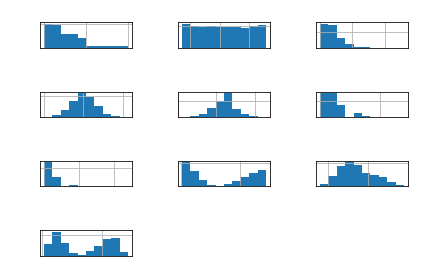

In [14]:
 # Display histograms of continuous variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
          'Bandwidth_GB_Year']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

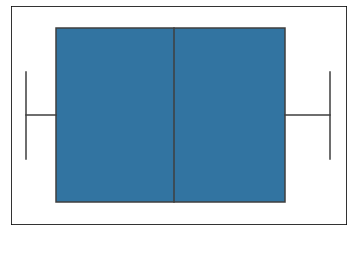

In [15]:
# Create corresponding Seaborn boxplots
sns.boxplot('Tenure', data = churn_df)
plt.show()

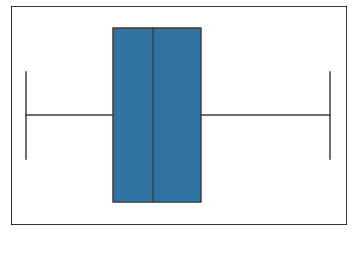

In [16]:
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

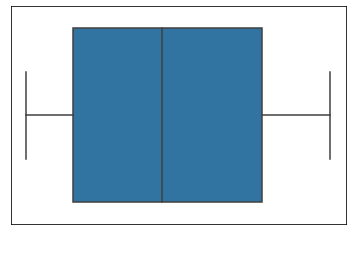

In [17]:
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

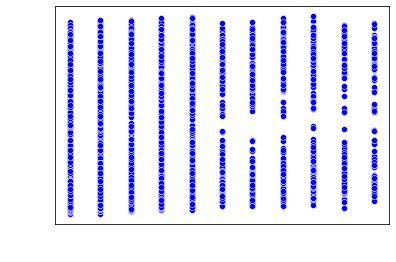

In [18]:
 # Run scatterplots to show direct or inverse relationships between target & independent variables
sns.scatterplot(x=churn_df['Children'], y=churn_df['Bandwidth_GB_Year'],
color='blue')
plt.show();

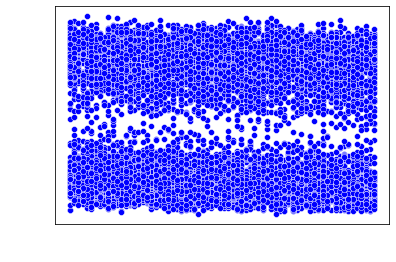

In [19]:
sns.scatterplot(x=churn_df['Age'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

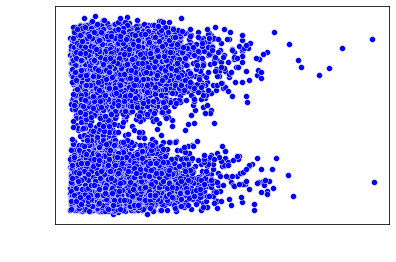

In [20]:
sns.scatterplot(x=churn_df['Income'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

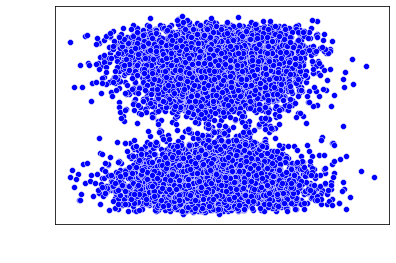

In [21]:
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

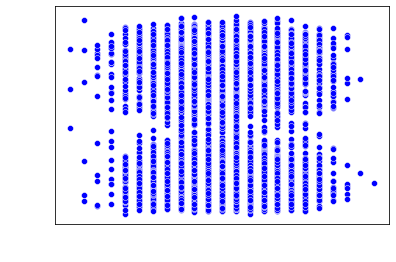

In [22]:
sns.scatterplot(x=churn_df['Email'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

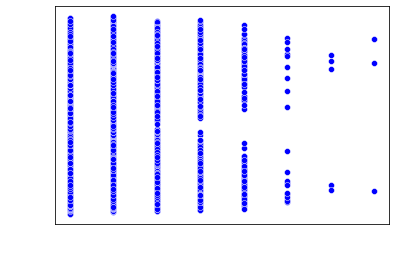

In [23]:
sns.scatterplot(x=churn_df['Contacts'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

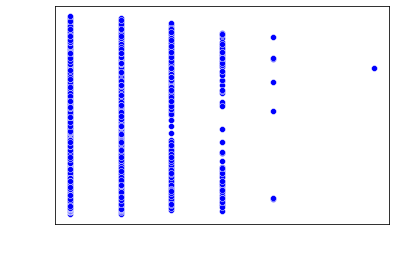

In [24]:
sns.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

NameError: name 'ax' is not defined

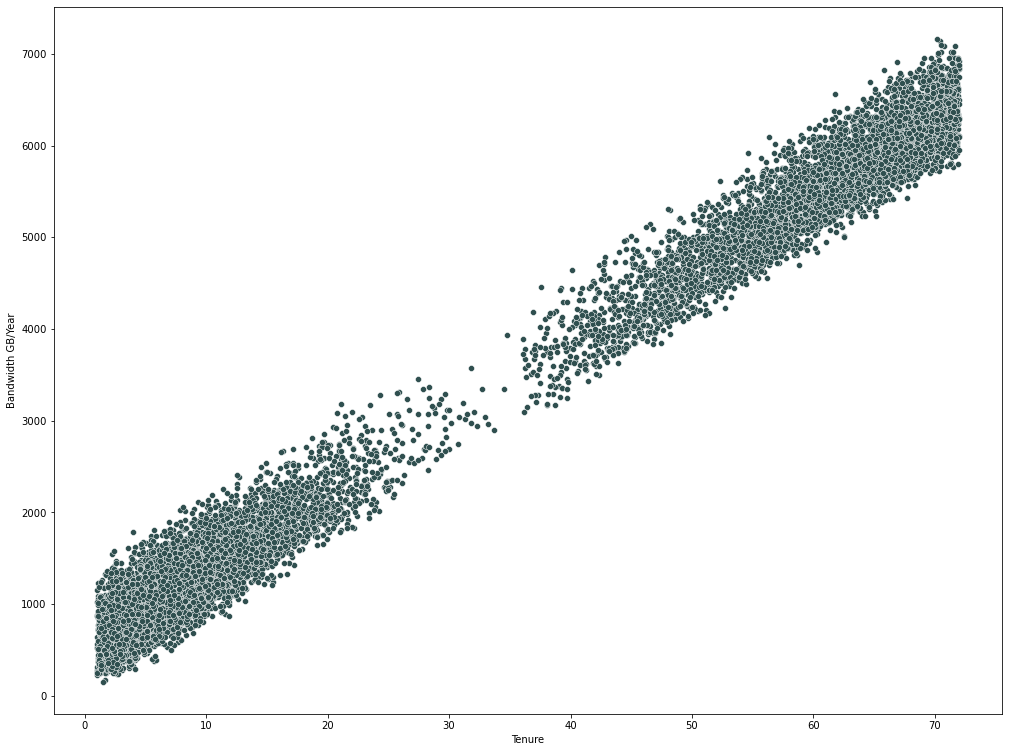

In [37]:
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Bandwidth_GB_Year'], color='darkslategray')
plt.rcParams["figure.figsize"] = [17,13]
plt.xlabel("Tenure")
plt.ylabel("Bandwidth GB/Year")
ax.set_facecolor("yellow")
plt.show();


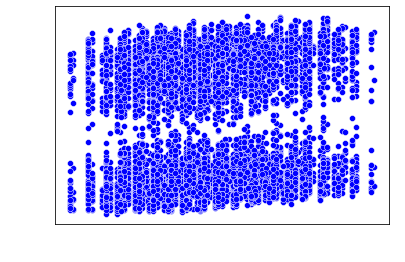

In [26]:
 sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

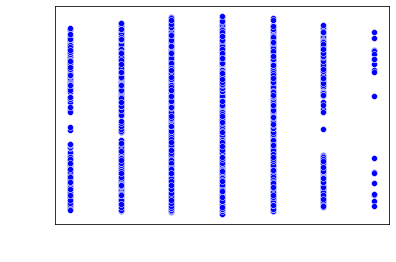

In [27]:
sns.scatterplot(x=churn_df['TimelyResponse'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

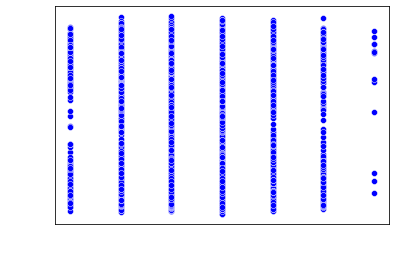

In [28]:
sns.scatterplot(x=churn_df['Fixes'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

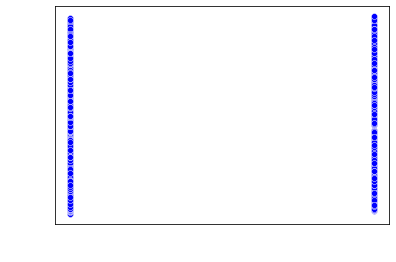

In [29]:
sns.scatterplot(x=churn_df['DummyTechie'], y=churn_df['Bandwidth_GB_Year'], color='blue')
plt.show();

In [30]:
# Extract cleaned dataset for submission
churn_df.to_csv('churn_prepared.csv')

In [31]:
churn_df = pd.read_csv('churn_prepared.csv')
df = churn_df.columns
print(df)

Index(['Unnamed: 0', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyChurn',
       'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling',
       'Bandwidth_GB_Year'],
      dtype='object')


In [32]:
# Initial regression equation to predict Bandwidth_GB_Year, 
# using continuous variables
churn_df['intercept'] = 1
lm_bandwidth = sm.OLS(churn_df['Bandwidth_GB_Year'], 
                      churn_df[['Children', 'Age', 'Income', 
                                'Outage_sec_perweek', 'Email', 'Contacts',
                                'Yearly_equip_failure', 'Tenure',
                                'MonthlyCharge',  'TimelyResponse', 'Fixes',
                                'Replacements', 'Reliability', 'Options',
                                'Respectfulness', 'Courteous', 'Listening',
                                'intercept']]).fit()
print(lm_bandwidth.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.329e+04
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:33:42   Log-Likelihood:                -68489.
No. Observations:               10000   AIC:                         1.370e+05
Df Residuals:                    9982   BIC:                         1.371e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                30.9275 

In [33]:
churn_df_dummies = churn_df.columns
print(churn_df_dummies)

Index(['Unnamed: 0', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyChurn',
       'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet',
       'DummyInternetService', 'DummyPhone', 'DummyMultiple',
       'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection',
       'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling',
       'Bandwidth_GB_Year', 'intercept'],
      dtype='object')


In [34]:
# Regression Model utilizing all dummy variables
churn_df['intercept'] = 1
lm_bandwidth = sm.OLS(churn_df['Bandwidth_GB_Year'],
                      churn_df[['Children', 'Age', 'Income',
                                'Outage_sec_perweek', 'Email', 'Contacts',
                                'Yearly_equip_failure', 'DummyTechie',
                                'DummyContract', 'DummyPort_modem',
                                'DummyTablet', 'DummyInternetService',
                                'DummyPhone', 'DummyMultiple',
                                'DummyOnlineSecurity', 'DummyOnlineBackup',
                                'DummyDeviceProtection', 'DummyTechSupport',
                                'DummyStreamingTV', 'DummyPaperlessBilling',
                                'Tenure','MonthlyCharge', 'TimelyResponse',
                                'Fixes', 'Replacements','Reliability',
                                'Options','Respectfulness', 'Courteous',
                                'Listening', 'intercept']]).fit()
print(lm_bandwidth.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.675e+04
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:33:43   Log-Likelihood:                -63241.
No. Observations:               10000   AIC:                         1.265e+05
Df Residuals:                    9969   BIC:                         1.268e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Children                 30.41

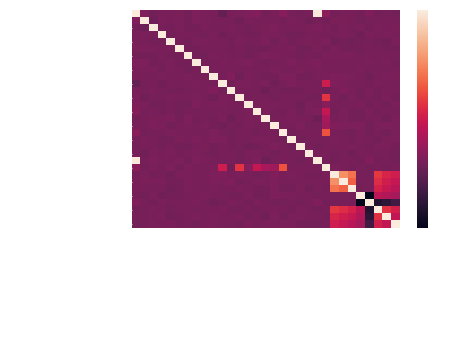

In [35]:
 # Dataframe for use in heatmap bivariate analysis of correlation
churn_bivariate = churn_df[['Bandwidth_GB_Year', 'Children', 'Age', 'Income',
                            'Outage_sec_perweek', 'Yearly_equip_failure',
                            'DummyTechie', 'DummyContract', 'DummyPort_modem',
                            'DummyTablet','DummyInternetService', 'DummyPhone',
                            'DummyMultiple','DummyOnlineSecurity',
                            'DummyOnlineBackup', 'DummyDeviceProtection',
                            'DummyTechSupport', 'DummyStreamingTV',
                            'DummyPaperlessBilling','Email', 'Contacts',
                            'Tenure', 'MonthlyCharge', 'TimelyResponse',
                            'Fixes', 'Replacements', 'Reliability',
                            'Options','Respectfulness', 'Courteous',
                            'Listening']]

# Create Seaborn heatmap
sns.heatmap(churn_bivariate.corr(), annot=False)
plt.show()

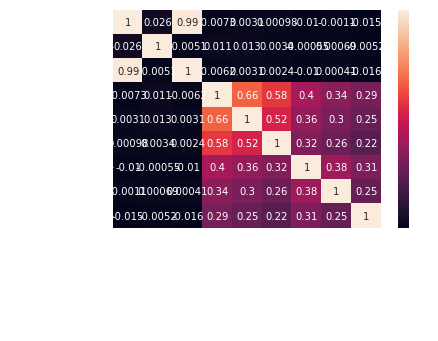

In [36]:
 churn_bivariate = churn_df[['Bandwidth_GB_Year', 'Children', 'Tenure',
                             'TimelyResponse', 'Fixes', 'Replacements',
                             'Respectfulness', 'Courteous', 'Listening']]
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

In [37]:
# Create a reduced OLS multiple regression
churn_df['intercept'] = 1
lm_bandwidth_reduced = sm.OLS(churn_df['Bandwidth_GB_Year'],
                              churn_df[['Children', 'Tenure', 'Fixes',
                                        'Replacements', 'intercept']]).fit()
print(lm_bandwidth_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.537e+05
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:33:44   Log-Likelihood:                -70407.
No. Observations:               10000   AIC:                         1.408e+05
Df Residuals:                    9995   BIC:                         1.409e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Children        31.1763      1.288     24.211   

<AxesSubplot:xlabel='Tenure'>

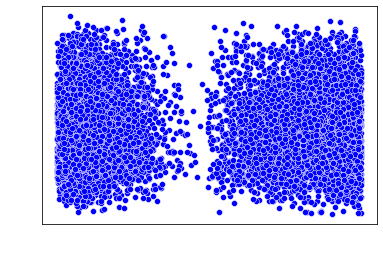

In [38]:
churn_df = pd.read_csv('churn_prepared.csv')
churn_df['intercept'] = 1
residuals = churn_df['Bandwidth_GB_Year'] - lm_bandwidth_reduced.predict(
    churn_df[['Children', 'Tenure', 'Fixes', 'Replacements','intercept']])
sns.scatterplot(x=churn_df['Tenure'],y=residuals,color='blue')
